In [1]:
import psycopg2 as pg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to db and return pandas dataframe
def db_connect_df(user, password, db, query ):
    """
    db_connect_df function takes database user, password, database name and query as arguments
    and returns a pandas dataframe
    """
    
    # Connect to the db on my machine
    conn = pg2.connect(
                    host = 'localhost',
                    database = db,
                    user = user,
                    password = password,
                    port = 5432)
    # Open curser to perform operations on db
    cur = conn.cursor()
    
    # Read db table as pandas dataframe
    df = pd.read_sql_query(query, conn)
    
    # Close the connection
    cur.close()
    conn.close()
    
    
 
    return df

In [3]:
# # Read database table as pd dataframe
# df = db_connect_df('postgres',
#                       '**********',
#                       "Employees",
#                       "SELECT * FROM employees as e LEFT JOIN dept_emp as de ON e.emp_no = de.emp_no")
# df

In [4]:
# Read database table as pd dataframe
df = db_connect_df('postgres',
                      '**********',
                      "Employees",
                      "SELECT emp_no, birth_date, first_name, last_name,gender,hire_date FROM employees")
df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


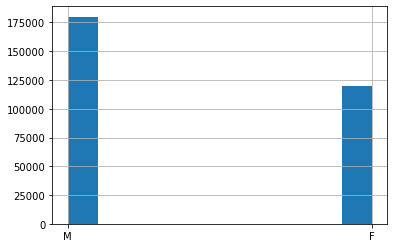

In [6]:
# Employees count by gender
df['gender'].hist();

In [7]:
# Convert date columns into datetime datatype
df['birth_date'] = pd.to_datetime(df['birth_date'], format="%Y-%m-%d")
df['hire_date'] = pd.to_datetime(df['hire_date'], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      300024 non-null  int64         
 1   birth_date  300024 non-null  datetime64[ns]
 2   first_name  300024 non-null  object        
 3   last_name   300024 non-null  object        
 4   gender      300024 non-null  object        
 5   hire_date   300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 13.7+ MB


In [8]:
# Create an age column 
df['age'] = pd.to_datetime('today').year-pd.to_datetime(df['birth_date'], format="%Y-%m-%d").dt.year
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,age
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,67
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,56
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,61
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,66
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,65
...,...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,62
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27,67
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,59
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,64


In [35]:
# Filter dataframe by gender column 
df1 = df.loc[df['gender'] == 'M']
df2 = df.loc[df['gender'] == 'F']

No handles with labels found to put in legend.
No handles with labels found to put in legend.


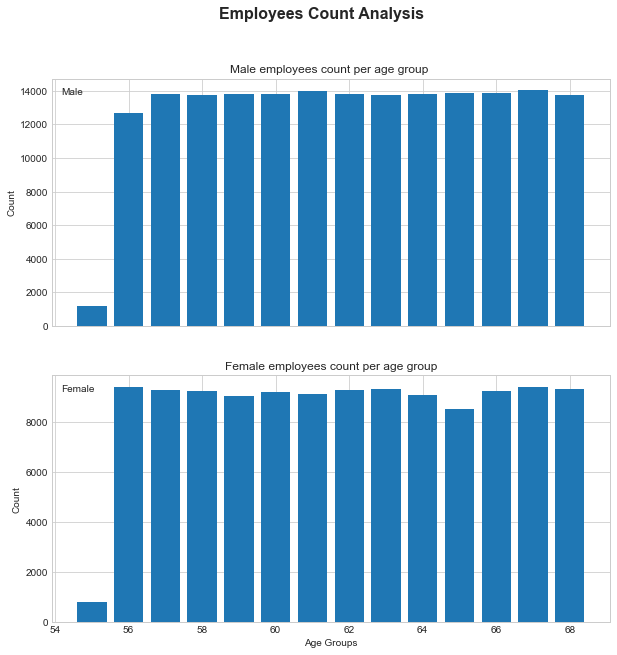

In [47]:
# Customize x and y axis limitation 

# Subplot
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1,figsize =(10,10),sharex=True)

# on ax0

# Add data to ax0
bar  = ax0.bar(x=df1['age'].unique(), height=df1['age'].value_counts())
# customize ax0
ax0.set(title ='Male employees count per age group ',ylabel= 'Count')

# add a legend 
ax0.legend(title="Male" )


# on ax1


# Add data to ax0
bar  = ax1.bar(x=df2['age'].unique(), height=df2['age'].value_counts())
# customize ax0
ax1.set(title ='Female employees count per age group',xlabel='Age Groups',ylabel= 'Count')

# add a legend 
ax1.legend(title="Female" )


# add title to the figure 
fig.suptitle("Employees Count Analysis",fontsize=16,fontweight='bold');